# Import Libraries

In [115]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import spacy
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [116]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreej\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sreej\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sreej\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Creating User Network Pattern

In [118]:
user_network_df = pd.read_csv("survey_results_public.csv") # importing user data
user_network_df.info(verbose=True)

c:\users\sreej\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 129 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    Respondent                   int64  
 1    Hobby                        object 
 2    OpenSource                   object 
 3    Country                      object 
 4    Student                      object 
 5    Employment                   object 
 6    FormalEducation              object 
 7    UndergradMajor               object 
 8    CompanySize                  object 
 9    DevType                      object 
 10   YearsCoding                  object 
 11   YearsCodingProf              object 
 12   JobSatisfaction              object 
 13   CareerSatisfaction           object 
 14   HopeFiveYears                object 
 15   JobSearchStatus              object 
 16   LastNewJob                   object 
 17   AssessJob1                   float64
 18   AssessJob2              

In [119]:
# we do not all columns. Feature extraction is being done to consider the columns we need
user_network_df = user_network_df[['Respondent','DevType','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','FrameworkWorkedWith','IDE','Methodology','VersionControl']]
user_network_df['Skill_Pattern'] = user_network_df[user_network_df.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
user_network_df = user_network_df[['Respondent','Skill_Pattern']]
user_network_df.head()

,Respondent,Skill_Pattern
0,1,"Full-stack developer,JavaScript;Python;HTML;CS..."
1,3,Database administrator;DevOps specialist;Full-...
2,4,Engineering manager;Full-stack developer
3,5,"Full-stack developer,C#;JavaScript;SQL;TypeScr..."
4,7,Data or business analyst;Desktop or enterprise...


In [120]:

# function for preprocessing - includes removes unnecessary non word character - convert into root form by lemmatization and stop words are also removed
stops = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def remove_stops(word):
    return  word not in stops and word not in list(string.punctuation)  and len(word)>2   
  
def preprocessing(corpus):
  temp_txt = []
  processed_text = []
  corpus = re.sub("'", "",corpus)
  corpus=re.sub("(\\d|\\W)+"," ",corpus) 
  corpus = corpus.replace("nbsp", "")
  temp_txt = [ wn.lemmatize(word, pos="v") for word in word_tokenize(corpus.lower()) if remove_stops(word)]
  processed_text = [word for word in temp_txt if remove_stops(word)]
  return " ".join(processed_text)

In [121]:
# user data sent for preprocessing
user_network_df['Skill_Pattern'] = user_network_df['Skill_Pattern'].map(str).apply(preprocessing)
user_network_df['Skill_Pattern'] = user_network_df['Skill_Pattern'].str.lower()
user_network_df.head() #preprocessed data

,Respondent,Skill_Pattern
0,1,full stack developer javascript python html cs...
1,3,database administrator devops specialist full ...
2,4,engineer manager full stack developer
3,5,full stack developer javascript sql typescript...
4,7,data business analyst desktop enterprise appli...


# Creating User pattern

In [122]:
# importing user data again to find similarity with initially created user data
user_trainset_df = pd.read_csv("survey_results_public.csv")
user_trainset_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 129 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    Respondent                   int64  
 1    Hobby                        object 
 2    OpenSource                   object 
 3    Country                      object 
 4    Student                      object 
 5    Employment                   object 
 6    FormalEducation              object 
 7    UndergradMajor               object 
 8    CompanySize                  object 
 9    DevType                      object 
 10   YearsCoding                  object 
 11   YearsCodingProf              object 
 12   JobSatisfaction              object 
 13   CareerSatisfaction           object 
 14   HopeFiveYears                object 
 15   JobSearchStatus              object 
 16   LastNewJob                   object 
 17   AssessJob1                   float64
 18   AssessJob2              

c:\users\sreej\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [123]:
# feature selection
user_trainset_df = user_trainset_df[['Respondent','DevType','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','FrameworkDesireNextYear','FrameworkWorkedWith','IDE','Methodology','VersionControl']]
user_trainset_df['Skill_Pattern'] = user_trainset_df[user_trainset_df.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
user_trainset_df = user_trainset_df[['Respondent','Skill_Pattern']]
user_trainset_df.head()

,Respondent,Skill_Pattern
0,1,"Full-stack developer,JavaScript;Python;HTML;CS..."
1,3,Database administrator;DevOps specialist;Full-...
2,4,Engineering manager;Full-stack developer
3,5,"Full-stack developer,C#;JavaScript;SQL;TypeScr..."
4,7,Data or business analyst;Desktop or enterprise...


In [124]:
#preprocessing
user_trainset_df['Skill_Pattern'] = user_trainset_df['Skill_Pattern'].map(str).apply(preprocessing)
user_trainset_df['Skill_Pattern'] = user_trainset_df['Skill_Pattern'].str.lower()


,Respondent,Skill_Pattern
0,1,full stack developer javascript python html cs...
1,3,database administrator devops specialist full ...
2,4,engineer manager full stack developer
3,5,full stack developer javascript sql typescript...
4,7,data business analyst desktop enterprise appli...


In [128]:
user_trainset_df.head()

,Respondent,Skill_Pattern
0,1,full stack developer javascript python html cs...
1,3,database administrator devops specialist full ...
2,4,engineer manager full stack developer
3,5,full stack developer javascript sql typescript...
4,7,data business analyst desktop enterprise appli...


In [129]:
user_trainset_df.isnull().sum()

Respondent       0
Skill_Pattern    0
dtype: int64

In [130]:
#Test is being performed on a user by finding similarity of this user to all other users based on profile
test_user = 302
index = np.where(user_trainset_df['Respondent'] == test_user)[0][0]
test_user_content = user_trainset_df.iloc[[index]]
test_user_content.Skill_Pattern

199    back end developer suite executive ceo cto etc...
Name: Skill_Pattern, dtype: object

# Using Spacy Algorithm

In [131]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


You should consider upgrading via the 'C:\Users\sreej\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [132]:
!dir  C:\Users\sreej\AppData\Local\Programs\Python\Python39\Lib\site-packages\en_core_web_lg\en_core_web_lg-3.0.0

 Volume in drive C is OS
 Volume Serial Number is 5EBC-CCB4

 Directory of C:\Users\sreej\AppData\Local\Programs\Python\Python39\Lib\site-packages\en_core_web_lg\en_core_web_lg-3.0.0

05/01/2021  10:26 PM    <DIR>          .
05/01/2021  10:26 PM    <DIR>          ..
05/01/2021  10:26 PM             6,259 accuracy.json
05/01/2021  10:26 PM    <DIR>          attribute_ruler
05/01/2021  10:26 PM             5,269 config.cfg
05/01/2021  10:26 PM    <DIR>          lemmatizer
05/01/2021  10:26 PM             9,388 meta.json
05/01/2021  10:26 PM    <DIR>          ner
05/01/2021  10:26 PM    <DIR>          parser
05/01/2021  10:26 PM    <DIR>          senter
05/01/2021  10:26 PM    <DIR>          tagger
05/01/2021  10:26 PM    <DIR>          tok2vec
05/01/2021  10:26 PM            77,375 tokenizer
05/01/2021  10:26 PM    <DIR>          vocab
               4 File(s)         98,291 bytes
              10 Dir(s)  169,258,369,024 bytes free


In [133]:
nlp = spacy.load(r'C:\Users\sreej\AppData\Local\Programs\Python\Python39\Lib\site-packages\en_core_web_lg\en_core_web_lg-3.0.0')

In [134]:
%%time
documents = []
for i in range(len(user_network_df)):
  doc = nlp("u'" + user_network_df['Skill_Pattern'][i] + "'")
  documents.append((doc,i))
print(len(documents))

98855
Wall time: 12min 9s


In [135]:
# function to compute similarity with spacy
def computeSimilaritySpacy(nlp, df, user_text, n=6):
    # Calculate similarity using spaCy
    similarities =[]
    doc1 = nlp("u'" + user_text + "'")
    for i in df.index:
      try:
            doc2 = documents[i][0]
            score = doc1.similarity(doc2)
            similarities.append((doc1, doc2, documents[i][1],score))
      except:
        continue

    return  similarities

In [136]:
test_user_content.Skill_Pattern[199]

'back end developer suite executive ceo cto etc devops specialist engineer manager javascript php python sql bash shell java javascript php python scala sql typescript bash shell mongodb redis mysql postgresql memcached elasticsearch mongodb redis mysql postgresql memcached amazon redshift amazon rds aurora google bigquery elasticsearch aws linux mac serverless aws linux mac serverless angular node react spark spring node react atom phpstorm vim visual studio code agile kanban lean scrum git'

In [141]:
%%time
 similarities_dataframe = computeSimilaritySpacy(nlp, user_network_df, test_user_content.Skill_Pattern[199], n=15)
similarities_dataframe

Wall time: 512 ms


[(u'back end developer suite executive ceo cto etc devops specialist engineer manager javascript php python sql bash shell java javascript php python scala sql typescript bash shell mongodb redis mysql postgresql memcached elasticsearch mongodb redis mysql postgresql memcached amazon redshift amazon rds aurora google bigquery elasticsearch aws linux mac serverless aws linux mac serverless angular node react spark spring node react atom phpstorm vim visual studio code agile kanban lean scrum git',
  u'full stack developer javascript python html css redis sql server mysql postgresql amazon rds aurora microsoft azure table cosmosdb sql etc aws azure linux firebase django react komodo vim visual studio code agile scrum git',
  0,
  0.953213893460617),
 (u'back end developer suite executive ceo cto etc devops specialist engineer manager javascript php python sql bash shell java javascript php python scala sql typescript bash shell mongodb redis mysql postgresql memcached elasticsearch mongo

In [143]:
recommendation_spacy = pd.DataFrame(similarities_dataframe).sort_values([3], ascending=False).head(11)

In [144]:
recommendation_spacy.reset_index(inplace=True)

In [145]:
spacy_indices = recommendation_spacy[2]
scores_indices = recommendation_spacy[3]

In [146]:
corpus = []
def get_recommendation(top, user_network_df, scores):
  global corpus
  recommendation = pd.DataFrame(columns = ['ApplicantID', 'SimilarUser',  'Skills', 'score'])
  index = 0
  for i in top:
    if user_network_df['Respondent'][i] != test_user:
      recommendation.at[index, 'ApplicantID'] = test_user
      corpus.append(user_network_df['Skill_Pattern'][i])
      recommendation.at[index, 'SimilarUser'] = user_network_df['Respondent'][i]
      recommendation.at[index, 'Skills'] = user_network_df['Skill_Pattern'][i]
      recommendation.at[index, 'score'] =  scores[index]
    index += 1
  return recommendation

In [147]:
# Recommendations to user 302 by spacy
get_recommendation(spacy_indices, user_network_df, scores_indices)

,ApplicantID,SimilarUser,Skills,score
0,302,55939,suite executive ceo cto etc javascript python ...,0.979169
1,302,50509,back end developer devops specialist full stac...,0.978248
2,302,62835,back end developer database administrator devo...,0.977426
3,302,62650,back end developer devops specialist full stac...,0.97723
4,302,72830,desktop enterprise applications developer devo...,0.977034
6,302,50203,suite executive ceo cto etc devops specialist ...,0.976661
7,302,75610,back end developer data scientist machine lear...,0.976464
8,302,40332,back end developer devops specialist java java...,0.976246
9,302,83556,back end developer data business analyst coffe...,0.976187
10,302,27145,back end developer devops specialist engineer ...,0.976173


## countvectorizer

In [148]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [149]:
cv_job = cv.fit_transform((user_network_df['Skill_Pattern'])) #fitting and transforming the vector
cv_job

<98855x205 sparse matrix of type '<class 'numpy.int64'>'
	with 2338433 stored elements in Compressed Sparse Row format>

In [150]:
from sklearn.metrics.pairwise import cosine_similarity
cv_user = cv.transform(user_q['Skill_Pattern'])
cosine_similarity_user_job = map(lambda x: cosine_similarity(cv_user, x),cv_job)

In [151]:
sim_cv = list(cosine_similarity_user_job)

In [152]:

sim_cv

[array([[0.50383147]]),
 array([[0.38533732]]),
 array([[0.12792043]]),
 array([[0.36181361]]),
 array([[0.25226249]]),
 array([[0.38138504]]),
 array([[0.39386795]]),
 array([[0.35737401]]),
 array([[0.55565084]]),
 array([[0.]]),
 array([[0.10577718]]),
 array([[0.13874919]]),
 array([[0.15075567]]),
 array([[0.34112115]]),
 array([[0.29009627]]),
 array([[0.05504819]]),
 array([[0.]]),
 array([[0.34249387]]),
 array([[0.13916749]]),
 array([[0.13089258]]),
 array([[0.36159971]]),
 array([[0.40988656]]),
 array([[0.30519594]]),
 array([[0.42426407]]),
 array([[0.27797972]]),
 array([[0.35527986]]),
 array([[0.45766204]]),
 array([[0.26444294]]),
 array([[0.13483997]]),
 array([[0.34896404]]),
 array([[0.51378309]]),
 array([[0.52035491]]),
 array([[0.31852949]]),
 array([[0.32003788]]),
 array([[0.60260952]]),
 array([[0.4411494]]),
 array([[0.57377764]]),
 array([[0.34945198]]),
 array([[0.12185436]]),
 array([[0.36052105]]),
 array([[0.23857283]]),
 array([[0.30824449]]),
 array([[

In [153]:
top = sorted(range(len(sim_cv)), key=lambda i: sim_cv[i], reverse=True)[:10]
top_scores = [sim_cv[i][0][0] for i in top]
# Recommendations to user 302 by countvectorizer
get_recommendation(top, user_network_df, top_scores)

,ApplicantID,SimilarUser,Skills,score
1,302,55712,devops specialist java javascript php python r...,0.751015
2,302,74629,back end developer devops specialist javascrip...,0.735829
3,302,8040,back end developer suite executive ceo cto etc...,0.73282
4,302,78591,back end developer suite executive ceo cto etc...,0.730297
5,302,79330,suite executive ceo cto etc engineer manager f...,0.726599
6,302,15579,back end developer engineer manager javascript...,0.721907
7,302,27145,back end developer devops specialist engineer ...,0.71696
8,302,24067,back end developer java javascript python scal...,0.715626
9,302,76424,engineer manager javascript php python sql htm...,0.713699


## tf-idf

In [154]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_job = tfidf.fit_transform((user_network_df['Skill_Pattern'])) #fitting and transforming the vector
tfidf_job

<98855x205 sparse matrix of type '<class 'numpy.float64'>'
	with 2338433 stored elements in Compressed Sparse Row format>

In [155]:
# performing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
tfidf_user = tfidf.transform(user_q['Skill_Pattern'])
cos_similarity_user_job = map(lambda x: cosine_similarity(tfidf_user, x),tfidf_job)

In [156]:
sim_tfidf = list(cos_similarity_user_job)

In [157]:
sim_tfidf

[array([[0.37249726]]),
 array([[0.31109809]]),
 array([[0.14699717]]),
 array([[0.20917348]]),
 array([[0.12258933]]),
 array([[0.26542168]]),
 array([[0.31450802]]),
 array([[0.21623006]]),
 array([[0.5207355]]),
 array([[0.]]),
 array([[0.02898336]]),
 array([[0.05944155]]),
 array([[0.06654657]]),
 array([[0.24640035]]),
 array([[0.1358984]]),
 array([[0.01579186]]),
 array([[0.]]),
 array([[0.20159044]]),
 array([[0.08708623]]),
 array([[0.04819882]]),
 array([[0.24273332]]),
 array([[0.24390902]]),
 array([[0.17829396]]),
 array([[0.36971972]]),
 array([[0.12298629]]),
 array([[0.22328409]]),
 array([[0.43418277]]),
 array([[0.11678483]]),
 array([[0.05891633]]),
 array([[0.28995552]]),
 array([[0.36160263]]),
 array([[0.3911692]]),
 array([[0.14539645]]),
 array([[0.25213229]]),
 array([[0.53031074]]),
 array([[0.28627352]]),
 array([[0.53106178]]),
 array([[0.22877858]]),
 array([[0.03451161]]),
 array([[0.20747737]]),
 array([[0.14057978]]),
 array([[0.19631212]]),
 array([[0.

In [158]:
top = sorted(range(len(sim_tfidf)), key=lambda i: sim_tfidf[i], reverse=True)[:10]
top_scores = [sim_tfidf[i][0][0] for i in top]
# Recommendations to user 302 by countvectorizer
get_recommendation(top,user_network_df, top_scores)

,ApplicantID,SimilarUser,Skills,score
1,302,8040,back end developer suite executive ceo cto etc...,0.731196
2,302,79330,suite executive ceo cto etc engineer manager f...,0.707591
3,302,98087,suite executive ceo cto etc data scientist mac...,0.694073
4,302,47307,back end developer front end developer full st...,0.672173
5,302,78591,back end developer suite executive ceo cto etc...,0.670673
6,302,89715,back end developer suite executive ceo cto etc...,0.668491
7,302,30712,back end developer devops specialist system ad...,0.668094
8,302,55712,devops specialist java javascript php python r...,0.666425
9,302,35006,back end developer suite executive ceo cto etc...,0.665781


## Evaluation

In [159]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [160]:
corpus

['suite executive ceo cto etc javascript python ruby scala sql typescript html css bash shell mongodb redis mysql postgresql sqlite apache hive amazon redshift amazon rds aurora elasticsearch aws azure google cloud platform app engine heroku linux mac serverless hadoop node react spark atom intellij ipython jupyter rstudio vim visual studio code agile kanban pair program scrum git',
 'back end developer devops specialist full stack developer coffeescript hack haskell javascript php python rust sql typescript html css bash shell mongodb redis postgresql sqlite memcached amazon redshift amazon rds aurora elasticsearch arduino aws linux mac raspberry salesforce serverless angular django node react tensorflow atom phpstorm vim agile kanban pair program scrum git',
 'back end developer database administrator devops specialist system administrator coffeescript erlang groovy java javascript python sql kotlin html css bash shell mongodb redis mysql postgresql amazon dynamodb memcached amazon r

## Spacy

In [161]:
top_words = get_top_n_words(corpus[:11], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'amazon'),
 Text(1, 0, 'sql'),
 Text(2, 0, 'developer'),
 Text(3, 0, 'javascript'),
 Text(4, 0, 'bash'),
 Text(5, 0, 'shell'),
 Text(6, 0, 'mongodb'),
 Text(7, 0, 'redis'),
 Text(8, 0, 'postgresql'),
 Text(9, 0, 'aws'),
 Text(10, 0, 'linux'),
 Text(11, 0, 'agile'),
 Text(12, 0, 'scrum'),
 Text(13, 0, 'git'),
 Text(14, 0, 'python'),
 Text(15, 0, 'mysql'),
 Text(16, 0, 'elasticsearch'),
 Text(17, 0, 'html'),
 Text(18, 0, 'css'),
 Text(19, 0, 'rds')]

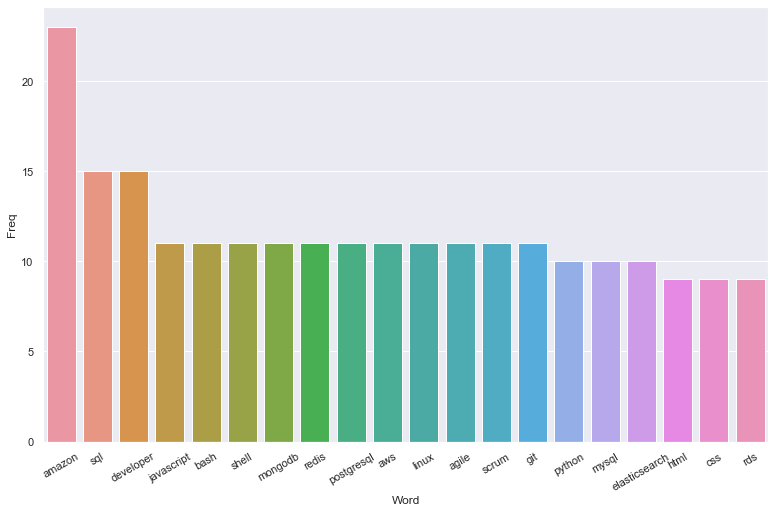

In [162]:
#following fig shows top skills in top 10 recommended user profile
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [163]:
#following data shows skills of user 302
user_q.Skill_Pattern.values.tolist()

['back end developer suite executive ceo cto etc devops specialist engineer manager javascript php python sql bash shell java javascript php python scala sql typescript bash shell mongodb redis mysql postgresql memcached elasticsearch mongodb redis mysql postgresql memcached amazon redshift amazon rds aurora google bigquery elasticsearch aws linux mac serverless aws linux mac serverless angular node react spark spring node react atom phpstorm vim visual studio code agile kanban lean scrum git']

## countvectorizer

In [165]:
top_words = get_top_n_words(corpus[11:21], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'amazon'),
 Text(1, 0, 'developer'),
 Text(2, 0, 'javascript'),
 Text(3, 0, 'python'),
 Text(4, 0, 'sql'),
 Text(5, 0, 'bash'),
 Text(6, 0, 'shell'),
 Text(7, 0, 'redis'),
 Text(8, 0, 'postgresql'),
 Text(9, 0, 'aws'),
 Text(10, 0, 'linux'),
 Text(11, 0, 'agile'),
 Text(12, 0, 'git'),
 Text(13, 0, 'mongodb'),
 Text(14, 0, 'mac'),
 Text(15, 0, 'node'),
 Text(16, 0, 'mysql'),
 Text(17, 0, 'elasticsearch'),
 Text(18, 0, 'back'),
 Text(19, 0, 'end')]

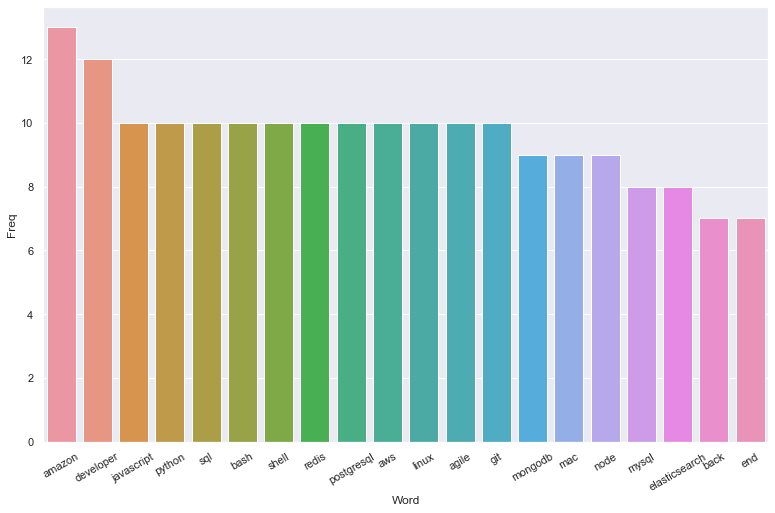

In [166]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [167]:
user_q.Skill_Pattern.values.tolist()

['back end developer suite executive ceo cto etc devops specialist engineer manager javascript php python sql bash shell java javascript php python scala sql typescript bash shell mongodb redis mysql postgresql memcached elasticsearch mongodb redis mysql postgresql memcached amazon redshift amazon rds aurora google bigquery elasticsearch aws linux mac serverless aws linux mac serverless angular node react spark spring node react atom phpstorm vim visual studio code agile kanban lean scrum git']

## tf-idf

In [168]:
top_words = get_top_n_words(corpus[21:], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'amazon'),
 Text(1, 0, 'developer'),
 Text(2, 0, 'javascript'),
 Text(3, 0, 'sql'),
 Text(4, 0, 'bash'),
 Text(5, 0, 'shell'),
 Text(6, 0, 'redis'),
 Text(7, 0, 'elasticsearch'),
 Text(8, 0, 'aws'),
 Text(9, 0, 'node'),
 Text(10, 0, 'agile'),
 Text(11, 0, 'scrum'),
 Text(12, 0, 'git'),
 Text(13, 0, 'php'),
 Text(14, 0, 'mongodb'),
 Text(15, 0, 'mysql'),
 Text(16, 0, 'postgresql'),
 Text(17, 0, 'rds'),
 Text(18, 0, 'aurora'),
 Text(19, 0, 'linux')]

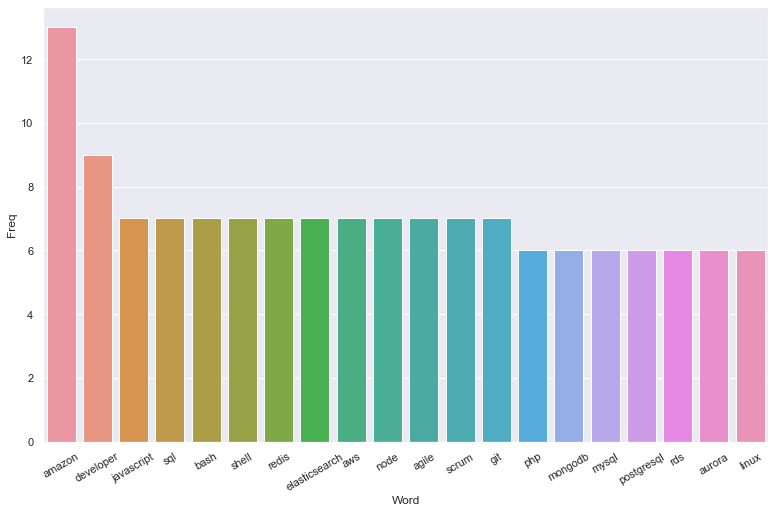

In [169]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [170]:
user_q.Skill_Pattern.values.tolist()

['back end developer suite executive ceo cto etc devops specialist engineer manager javascript php python sql bash shell java javascript php python scala sql typescript bash shell mongodb redis mysql postgresql memcached elasticsearch mongodb redis mysql postgresql memcached amazon redshift amazon rds aurora google bigquery elasticsearch aws linux mac serverless aws linux mac serverless angular node react spark spring node react atom phpstorm vim visual studio code agile kanban lean scrum git']